In [2]:
from qiskit.circuit import QuantumCircuit
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
from qiskit import transpile

In [3]:
circuit = QuantumCircuit(3, 3)


In [4]:
circuit.x(0)
circuit.barrier(range(3))
circuit.h(1)
circuit.cx(1, 2)
circuit.cx(0, 1)
circuit.h(0)
circuit.barrier(range(3))
circuit.measure(range(2), range(2))
circuit.barrier(range(3))
circuit.cx(1, 2)
circuit.cz(0, 2)
circuit.draw()


┌───┐ ░                ┌───┐ ░ ┌─┐    ░         
q_0: ┤ X ├─░─────────────■──┤ H ├─░─┤M├────░───────■─
     └───┘ ░ ┌───┐     ┌─┴─┐└───┘ ░ └╥┘┌─┐ ░       │ 
q_1: ──────░─┤ H ├──■──┤ X ├──────░──╫─┤M├─░───■───┼─
           ░ └───┘┌─┴─┐└───┘      ░  ║ └╥┘ ░ ┌─┴─┐ │ 
q_2: ──────░──────┤ X ├───────────░──╫──╫──░─┤ X ├─■─
           ░      └───┘           ░  ║  ║  ░ └───┘   
c: 3/════════════════════════════════╩══╩════════════
                                     0  1

Simulation

In [5]:
backend = AerSimulator()


In [6]:
qc_compiled = transpile(circuit, backend)

In [7]:
job_sim = backend.run(qc_compiled, shots=1024)
result_sim = job_sim.result()

In [8]:
 counts = result_sim.get_counts(qc_compiled)
print(counts)


{'011': 231, '001': 260, '000': 245, '010': 288}


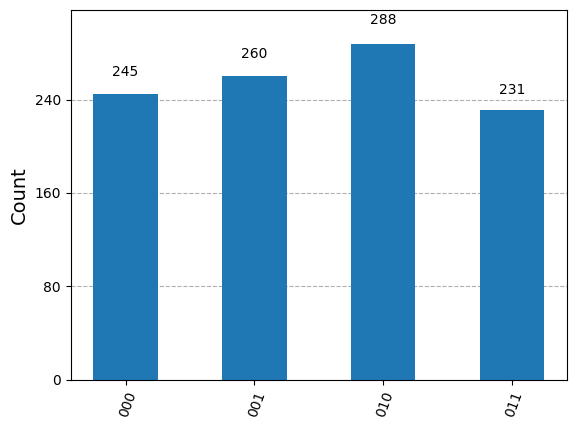

In [9]:
plot_histogram(counts)